In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df_encoded = pd.get_dummies(df[['carbody', 'drivewheel']], drop_first=True)
X = pd.concat([df[['horsepower', 'curbweight', 'enginesize']], df_encoded], axis=1)
y = df['price']

In [4]:
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)

lin_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)

y_pred_linear = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

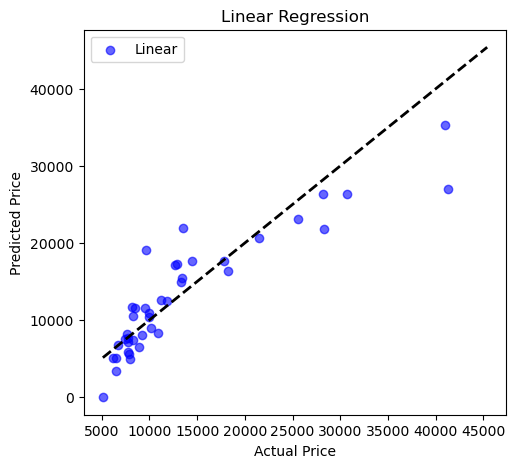

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.legend()

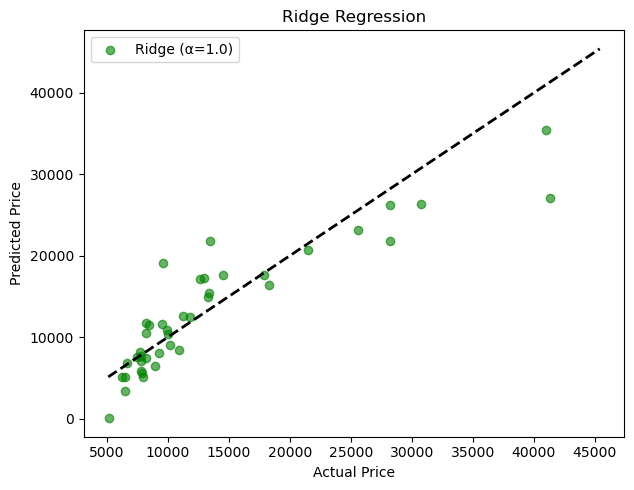

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6, label='Ridge (α=1.0)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression")
plt.legend()

plt.tight_layout()
